In [6]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

from utils.funs import count_outliers
from utils.symmetry_scores import get_scores

from transformers import ViTModel

In [7]:
dir = '../../../_data/fig-symmetry-vision-transformers/DINO-query-key.pkl'

if os.path.isfile(dir):
    with open(dir, 'rb') as file:
        models = pickle.load(file)
else: models = {}

In [8]:
model = ViTModel.from_pretrained('facebook/dino-vits16')

Some weights of ViTModel were not initialized from the model checkpoint at facebook/dino-vits16 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [9]:
path = ["encoder.layer[", "].attention.attention.query.weight", "].attention.attention.key.weight"]

'DINO small (5M parameters)'
dh = 64
patch = 8
l = 12
d = 384
h = d // dh
model = ViTModel.from_pretrained('facebook/dino-vits8')
sym_scores = get_scores(d, l, h, dh, model, path)
models['DINO-small-8'] = [l, d, h, dh, sym_scores]

'DeiT base (86M parameters)'
dh = 64
patch = 8
l = 12
d = 768
h = d // dh
model = ViTModel.from_pretrained('facebook/dino-vitb8')
sym_scores = get_scores(d, l, h, dh, model, path)
models['DINO-base-8'] = [l, d, h, dh, sym_scores]

'DINO small (5M parameters)'
dh = 64
patch = 16
l = 12
d = 384
h = d // dh
model = ViTModel.from_pretrained('facebook/dino-vits16')
sym_scores = get_scores(d, l, h, dh, model, path)
models['DINO-small-16'] = [l, d, h, dh, sym_scores]

'DeiT base (86M parameters)'
dh = 64
patch = 16
l = 12
d = 768
h = d // dh
model = ViTModel.from_pretrained('facebook/dino-vitb16')
sym_scores = get_scores(d, l, h, dh, model, path)
models['DINO-base-16'] = [l, d, h, dh, sym_scores]

'save'
with open(dir, 'wb') as file:
    pickle.dump(models, file)

Some weights of ViTModel were not initialized from the model checkpoint at facebook/dino-vits8 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of ViTModel were not initialized from the model checkpoint at facebook/dino-vitb8 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of ViTModel were not initialized from the model checkpoint at facebook/dino-vits16 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of ViTModel were not initialized from the model checkpoint at facebook/dino-vitb16 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight

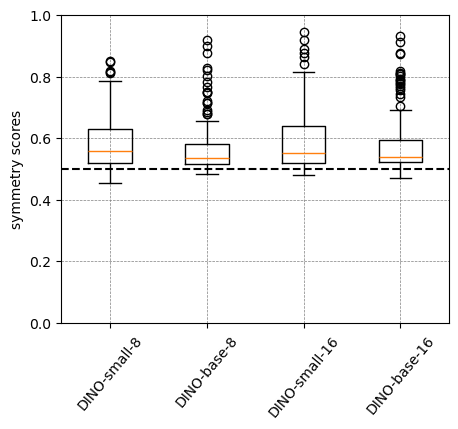

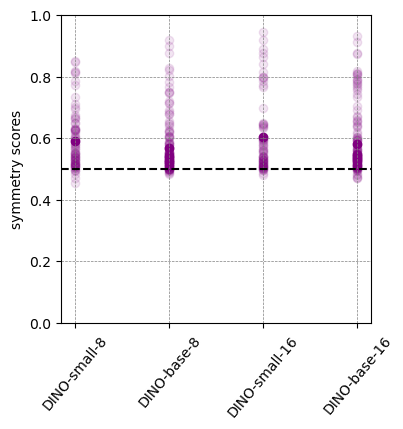

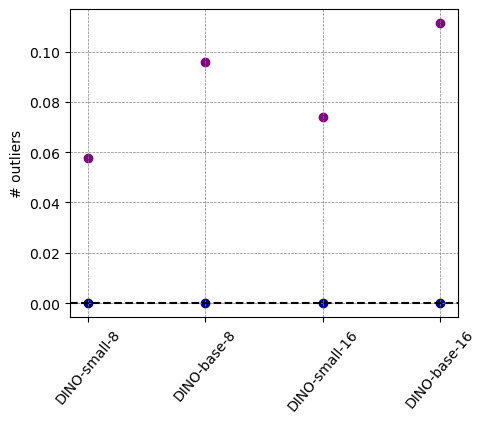

In [10]:
from utils.visualization import symmetry_score_boxplot, symmetry_score_scatter, symmetry_score_outliers

symmetry_score_boxplot(models)
symmetry_score_scatter(models)
symmetry_score_outliers(models)